<a href="https://colab.research.google.com/github/aaghouse/Cybersecurity_ML/blob/main/neural_net_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Descriptioin:** Cybersecurity scanning and detection often involves capturing network packets using industry standard sniffers and analyzing headers to monitor and detect threats. This project scenario involves gathering network traffic information and analyzing it to Identify threat or normal traffic. Once Identified we will then classify it into various bins to identify the type of threats. This project has two parts ( Part I & II), in total 4 files.

**Part I** EDA ( Exploratory Data Analysis), model experimentation, choosing the right model, tuning and then perform binary classification.

**File 1:** cyber_ml_capstone.ipynb
**File 2:** optimized_model.ipynb
**File 3:** cool_plots.ipynb
**Part II** Leverage Neural Networks, evaluate various models, choose the right model, fine tune it and perform multiclass classification.

**File 4:** neural_net_multi_class_classification.ipynb

**Part II This is File 4 of 4: neural_net_multi_class_classification.ipynb**

EDA part of the input data remains the same. This file will evaluate ANN, CNN and RNN.  We will pick a model that works best in this case RNN and finetune it to develope a stable model for multiclass classification.

Input data has 9 types of cybersecurity threat vectors, Past identifying a network packet is a thread identifying these threats into right types of attack will give us insight to take necessary action as next steps.

As output we will generate loss and accuracy curves over epoch runs.

**Observed results:**
>loss: 2604.1521 - accuracy: 0.4533
Test Accuracy ANN : 45.33%

>loss: 2604.1521 - accuracy: 0.4533
Test Accuracy CNN : 45.33%

>loss: 0.4200 - accuracy: 0.7887
Test Accuracy RNN : 78.87%

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
network = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/Train_Test_Network.csv')
#Dropping Columns, largely because they have "-" on overwhelming majority of entries which makes is ineligible for analysis or no value in imputing.
# (or) verbose to the extent there are so many unique values which makes is unnecessary. 28 fields seems to be eligible to be inclused for analysis.
net_df = network.drop(['src_ip', 'dst_ip', 'weird_notice', 'weird_addl', 'weird_name', 'http_trans_depth',
       'http_method', 'http_uri', 'http_version', 'http_request_body_len',
       'http_response_body_len', 'http_status_code', 'http_user_agent',
       'http_orig_mime_types', 'http_resp_mime_types', 'ssl_cipher',
       'ssl_subject', 'dns_query', 'ssl_issuer', 'src_port', 'dst_port', 'dns_AA', 'dns_RD', 'dns_RA', 'dns_rejected', 'ssl_version', 'ssl_established', 'ssl_resumed'], axis=1)
net_df = net_df.drop(['ts'], axis=1)
net_df['service'] = net_df['service'].replace('-', 'Unknown')
#netsc_df = net_df.drop(['type'], axis=1) # This feature gives us  sub classification in threats that will be used for multiclass classification.
net_df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461043 entries, 0 to 461042
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   proto         461043 non-null  object 
 1   service       461043 non-null  object 
 2   duration      461043 non-null  float64
 3   src_bytes     461043 non-null  int64  
 4   dst_bytes     461043 non-null  int64  
 5   conn_state    461043 non-null  object 
 6   missed_bytes  461043 non-null  int64  
 7   src_pkts      461043 non-null  int64  
 8   src_ip_bytes  461043 non-null  int64  
 9   dst_pkts      461043 non-null  int64  
 10  dst_ip_bytes  461043 non-null  int64  
 11  dns_qclass    461043 non-null  int64  
 12  dns_qtype     461043 non-null  int64  
 13  dns_rcode     461043 non-null  int64  
 14  label         461043 non-null  int64  
 15  type   

In [ ]:
net_df['service'] = net_df['service'].replace('Unknown', 'UN')
# Clean values in the DataFrame by stripping leading and trailing whitespace
net_df = net_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
columns_to_convert = ['proto', 'service', 'conn_state']
net_df[columns_to_convert] = net_df[columns_to_convert].astype(str)
net_df = net_df.reset_index(drop=True)

In [ ]:
# In sections above we used piplines to encode and implement standardscalar and transform columns.
# Below we will manually do the same encoding and standard scalar.
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define which columns to one-hot encode and which to standard scale
one_hot_columns = ['dns_rcode', 'dns_qtype', 'dns_qclass', 'conn_state', 'service', 'proto', 'type']
scaler_columns = ['duration', 'src_bytes', 'dst_bytes', 'missed_bytes', 'src_pkts', 'src_ip_bytes', 'dst_pkts', 'dst_ip_bytes']

# Create a column transformer without remainder='passthrough'
preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first'), one_hot_columns),  # Apply OneHotEncoder to categorical columns
    (StandardScaler(), scaler_columns),              # Apply StandardScaler to numeric columns
    remainder='passthrough'
)

# Fit and transform the data using the column transformer
transformed_data = preprocessor.fit_transform(net_df)

# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out(input_features=net_df.columns)

# Convert the sparse matrix to a dense matrix
# converting data to array produced the output in desired format with the right number of clumns as opposed to 1 column with \n's and \t's
transformed_data = transformed_data.toarray()

# Create a DataFrame from the transformed data with column names
netclean_df = pd.DataFrame(transformed_data, columns=feature_names)



# The index will be maintained
print(netclean_df)
print(netclean_df.columns)

        onehotencoder__dns_rcode_1  onehotencoder__dns_rcode_2  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
461038                         0.0                         0.0   
461039                         0.0                         0.0   
461040                         0.0                         0.0   
461041                         0.0                         0.0   
461042                         0.0                         0.0   

        onehotencoder__dns_rcode_3  onehotencoder__dns_rcode_5  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2        

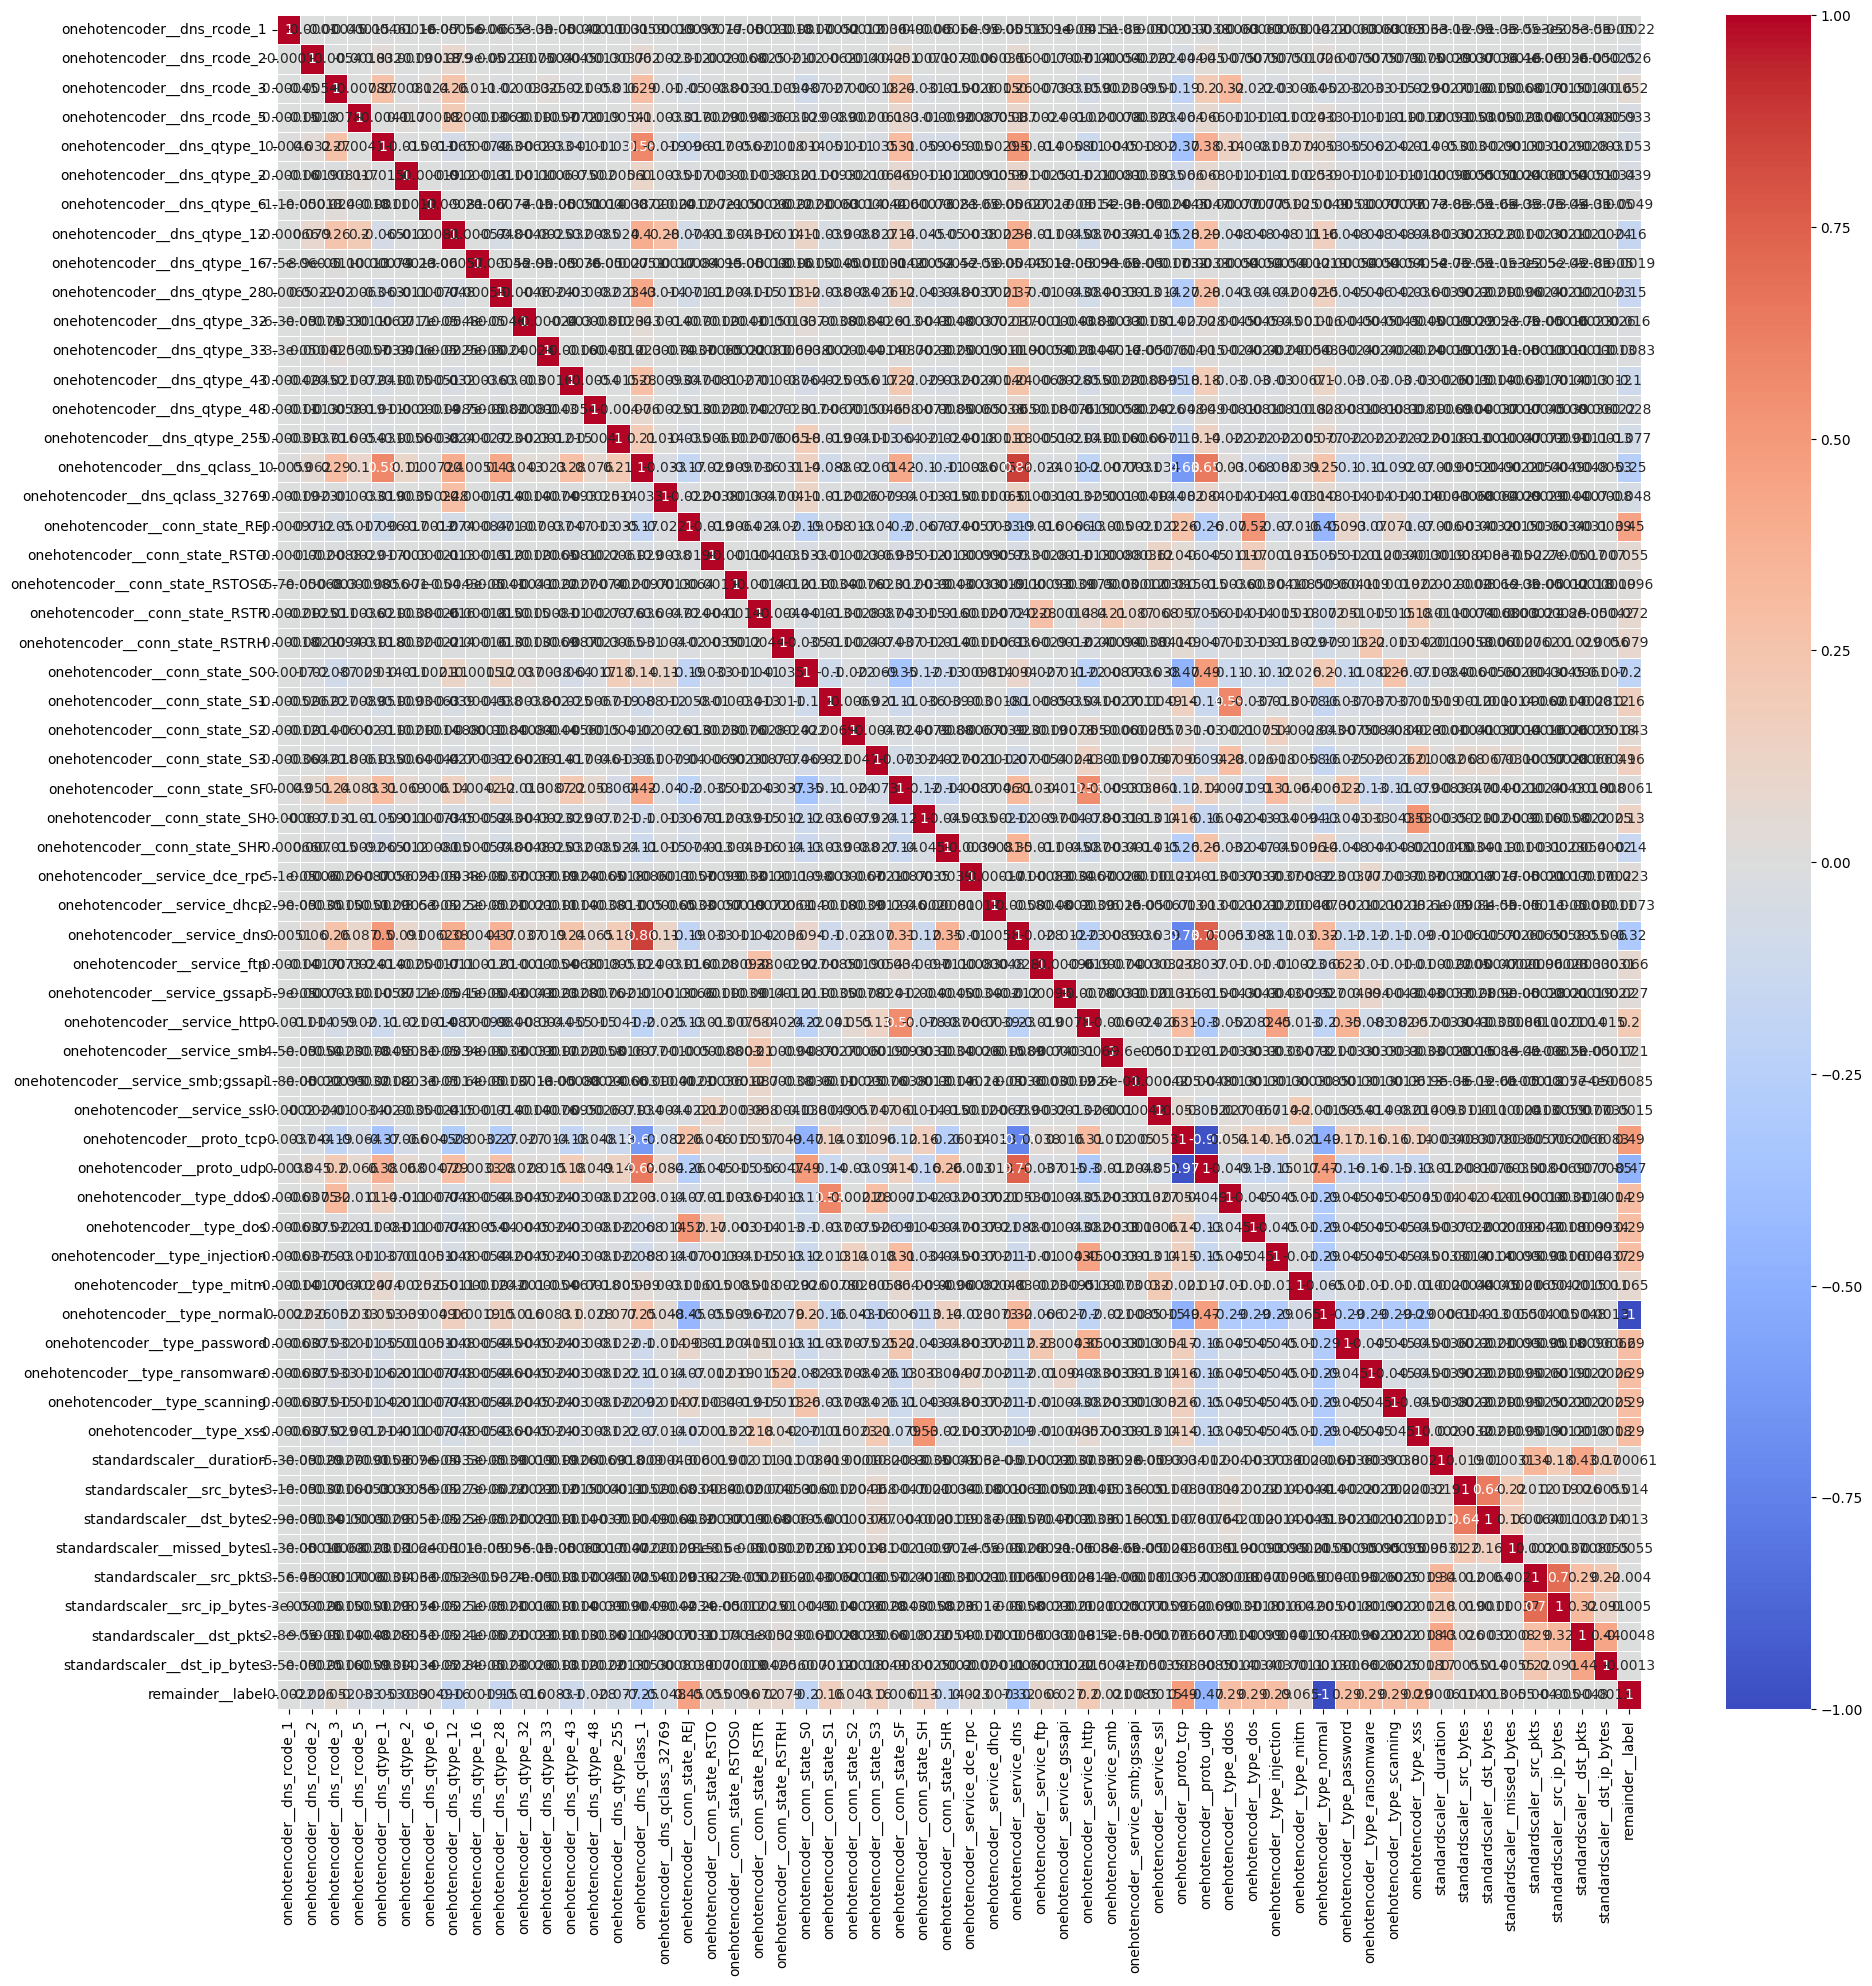

In [ ]:
#Cleaned DataFrame to compute netclean_df
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = netclean_df.corr()
plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
#CLeaned DataFrame to compute netclean_df
#Output is too many to make any meaningful decision.
#So we need to come up with an alternate approach to reduce feature sets.
#Perhaps manual setting threshold value and examining correlation_matrix.
# Define a correlation threshold and reducing features to minimize computational expense and model analysis stability.
correlation_threshold = 0.7

# Find pairs of highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop/print the highly correlated features
print('highly - corelated features', correlated_features)
print('******************************************************************************************************************')
netclean_redf_df = netclean_df.drop(columns=correlated_features)
print(netclean_df.columns)
print(netclean_df.shape)
print('==>>')
print(netclean_redf_df.shape)
print(netclean_redf_df.columns)

# Output from multiple steps above can now be stored as a CSV file to lod it for later quick use cases going forward.

from google.colab import files
netclean_redf_df.to_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/netclean_redf_df_with_threat_type.csv', encoding = 'utf-8-sig')

highly - corelated features {'onehotencoder__proto_udp', 'remainder__label', 'onehotencoder__service_dns', 'onehotencoder__proto_tcp'}
******************************************************************************************************************
Index(['onehotencoder__dns_rcode_1', 'onehotencoder__dns_rcode_2',
       'onehotencoder__dns_rcode_3', 'onehotencoder__dns_rcode_5',
       'onehotencoder__dns_qtype_1', 'onehotencoder__dns_qtype_2',
       'onehotencoder__dns_qtype_6', 'onehotencoder__dns_qtype_12',
       'onehotencoder__dns_qtype_16', 'onehotencoder__dns_qtype_28',
       'onehotencoder__dns_qtype_32', 'onehotencoder__dns_qtype_33',
       'onehotencoder__dns_qtype_43', 'onehotencoder__dns_qtype_48',
       'onehotencoder__dns_qtype_255', 'onehotencoder__dns_qclass_1',
       'onehotencoder__dns_qclass_32769', 'onehotencoder__conn_state_REJ',
       'onehotencoder__conn_state_RSTO', 'onehotencoder__conn_state_RSTOS0',
       'onehotencoder__conn_state_RSTR', 'onehotenco

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
11527/11527 [==============================] - 34s 3ms/step - loss: 6.4746 - accuracy: 0.6308 - val_loss: 16.6483 - val_accuracy: 0.6961
Epoch 2/10
11527/11527 [==============================] - 39s 3ms/step - loss: 48.0139 - accuracy: 0.5639 - val_loss: 99.7301 - val_accuracy: 0.6518
Epoch 3/10
11527/11527 [==============================] - 37s 3ms/step - loss: 141.3378 - accuracy: 0.5424 - val_loss: 444.9474 - val_accuracy: 0.1616
Epoch 4/10
11527/11527 [==============================] - 36s 3ms/step - loss: 289.7871 - accuracy: 0.5347 - val_loss: 332.5690 - val_accuracy: 0.6562
Epoch 5/10
11527/11527 [==============================] - 35s 3ms/step - loss: 479.8945 - accuracy: 0.5320 - val_loss: 309.8677 - val_accuracy: 0.6576
Epoch 6/10
11527/11527 [==============================] - 42s 4ms/step - loss: 733.3254 - accuracy: 0.5320 - val_loss: 58

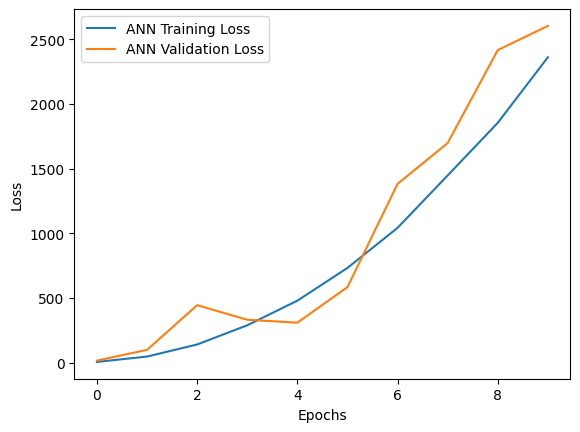

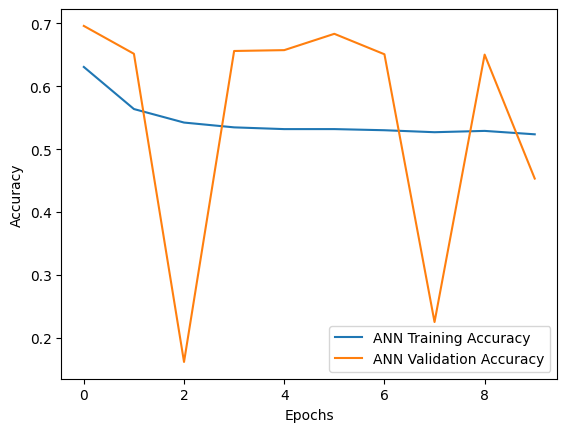

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import drive

drive.mount('/content/drive')

netclean_redf_df_with_multi_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/netclean_redf_df_with_threat_type.csv', index_col=0)

# Features (X)
X = netclean_redf_df_with_multi_class.drop(['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss'], axis=1)

# Target variable (y)
y = netclean_redf_df_with_multi_class[['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss']]

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a neural network model
modelann = Sequential()
modelann.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
modelann.add(Dense(32, activation='relu'))
modelann.add(Dense(9, activation='softmax'))  # Softmax for 9-class classification for each output

# Compiling the model
modelann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
historyann = modelann.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = modelann.evaluate(X_test, y_test)
print(f"Test Accuracy ANN : {accuracy * 100:.2f}%")

# Plotting training and validation loss
plt.plot(historyann.history['loss'], label='ANN Training Loss')
plt.plot(historyann.history['val_loss'], label='ANN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(historyann.history['accuracy'], label='ANN Training Accuracy')
plt.plot(historyann.history['val_accuracy'], label='ANN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
11527/11527 [==============================] - 101s 9ms/step - loss: 49354.3984 - accuracy: 0.5343 - val_loss: 213344.7188 - val_accuracy: 0.6504
Epoch 2/10
11527/11527 [==============================] - 98s 9ms/step - loss: 699333.8750 - accuracy: 0.5171 - val_loss: 2118725.5000 - val_accuracy: 0.1141
Epoch 3/10
11527/11527 [==============================] - 98s 9ms/step - loss: 3098584.0000 - accuracy: 0.5084 - val_loss: 5834600.0000 - val_accuracy: 0.6505
Epoch 4/10
11527/11527 [==============================] - 93s 8ms/step - loss: 8545679.0000 - accuracy: 0.5035 - val_loss: 8548905.0000 - val_accuracy: 0.6504
Epoch 5/10
11527/11527 [==============================] - 94s 8ms/step - loss: 18402010.0000 - accuracy: 0.5009 - val_loss: 19571226.0000 - val_accuracy: 0.6504
Epoch 6/10
11527/11527 [==============================] - 96s 8ms/step - loss

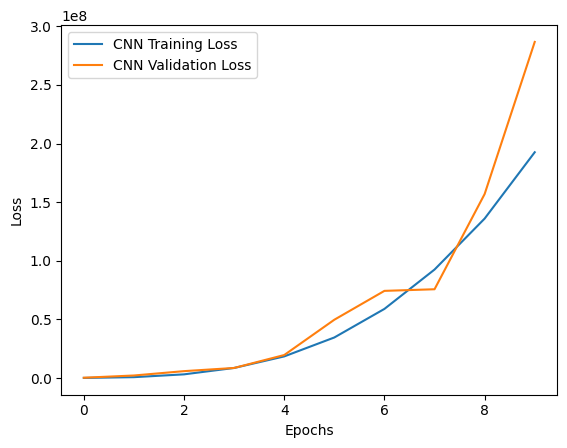

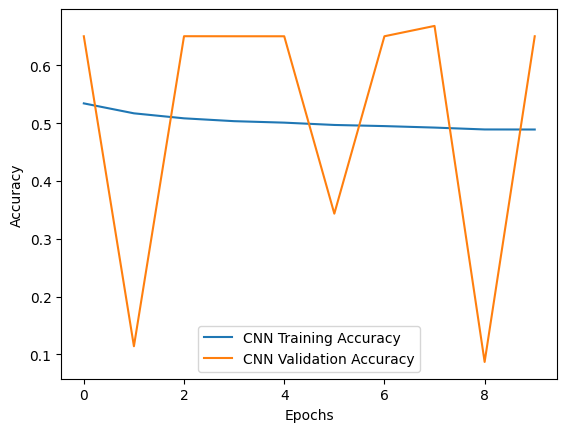

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from google.colab import drive

drive.mount('/content/drive')

netclean_redf_df_with_multi_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/netclean_redf_df_with_threat_type.csv', index_col=0)

# Features (X)
X = netclean_redf_df_with_multi_class.drop(['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss'], axis=1)

# Target variable (y)
y = netclean_redf_df_with_multi_class[['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss']]

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for CNN
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))  # Reshape for CNN input
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))  # Reshape for CNN input

# Creating a CNN model
modelcnn = Sequential()
modelcnn.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
modelcnn.add(MaxPooling1D(2))
modelcnn.add(Conv1D(32, 3, activation='relu'))
modelcnn.add(MaxPooling1D(2))
modelcnn.add(Flatten())
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dense(9, activation='softmax'))  # Softmax for 9-class classification for each output

# Compiling the model
modelcnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
historycnn = modelcnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss, accuracy = modelann.evaluate(X_test, y_test)
print(f"Test Accuracy CNN : {accuracy * 100:.2f}%")

# Plotting training and validation loss
plt.plot(historycnn.history['loss'], label='CNN Training Loss')
plt.plot(historycnn.history['val_loss'], label='CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(historycnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(historycnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
11527/11527 [==============================] - 62s 5ms/step - loss: 0.6000 - accuracy: 0.7467 - val_loss: 0.5705 - val_accuracy: 0.7547
Epoch 2/10
11527/11527 [==============================] - 58s 5ms/step - loss: 0.5576 - accuracy: 0.7599 - val_loss: 0.5542 - val_accuracy: 0.7648
Epoch 3/10
11527/11527 [==============================] - 56s 5ms/step - loss: 0.5284 - accuracy: 0.7665 - val_loss: 0.5181 - val_accuracy: 0.7668
Epoch 4/10
11527/11527 [==============================] - 62s 5ms/step - loss: 0.5040 - accuracy: 0.7718 - val_loss: 0.5010 - val_accuracy: 0.7601
Epoch 5/10
11527/11527 [==============================] - 55s 5ms/step - loss: 0.4841 - accuracy: 0.7771 - val_loss: 0.4901 - val_accuracy: 0.7685
Epoch 6/10
11527/11527 [==============================] - 54s 5ms/step - loss: 0.4682 - accuracy: 0.7838 - val_loss: 0.4704 - val_accura

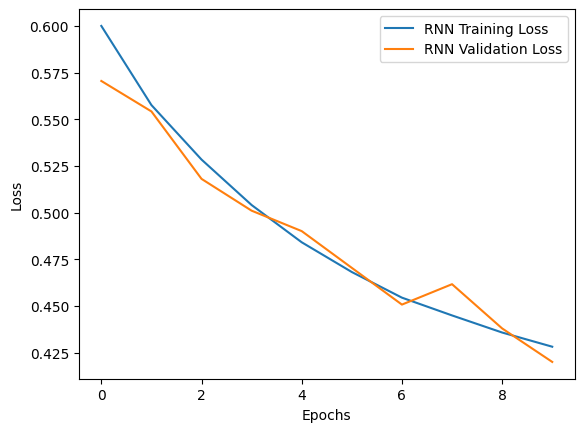

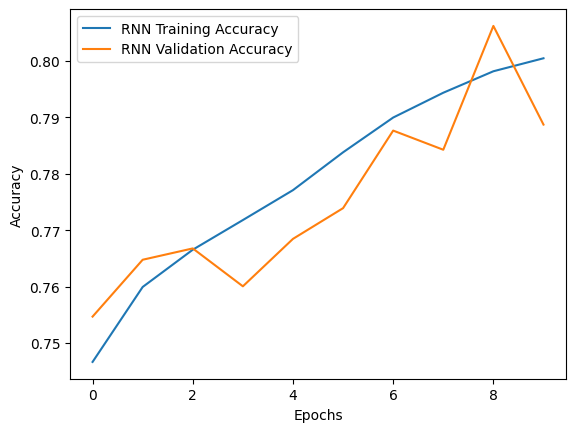

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

netclean_redf_df_with_multi_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/netclean_redf_df_with_threat_type.csv', index_col=0)

# Features (X)
X = netclean_redf_df_with_multi_class.drop(['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss'], axis=1)

# Target variable (y)
y = netclean_redf_df_with_multi_class[['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss']]

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Reshape for RNN input
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Reshape for RNN input

# Creating a SimpleRNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model_rnn.add(SimpleRNN(32, return_sequences=False))
model_rnn.add(Dense(9, activation='softmax'))  # Softmax for 9-class classification for each output

# Compiling the model
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluating the model
loss, accuracy = model_rnn.evaluate(X_test_rnn, y_test)
print(f"Test Accuracy RNN : {accuracy * 100:.2f}%")

# Plotting training and validation loss
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/15
23053/23053 [==============================] - 167s 7ms/step - loss: 0.6012 - accuracy: 0.7522 - val_loss: 0.5989 - val_accuracy: 0.7550
Epoch 2/15
23053/23053 [==============================] - 169s 7ms/step - loss: 0.6277 - accuracy: 0.7628 - val_loss: 0.7372 - val_accuracy: 0.7439
Epoch 3/15
23053/23053 [==============================] - 168s 7ms/step - loss: 0.6744 - accuracy: 0.7670 - val_loss: 0.7700 - val_accuracy: 0.7615
Epoch 4/15
23053/23053 [==============================] - 162s 7ms/step - loss: 0.7272 - accuracy: 0.7700 - val_loss: 0.8308 - val_accuracy: 0.7612
Epoch 5/15
23053/23053 [==============================] - 157s 7ms/step - loss: 0.7978 - accuracy: 0.7707 - val_loss: 0.8559 - val_accuracy: 0.7696
Epoch 6/15
23053/23053 [==============================] - 151s 7ms/step - loss: 0.8777 - accuracy: 0.7692 - val_loss: 0.8555 - val_

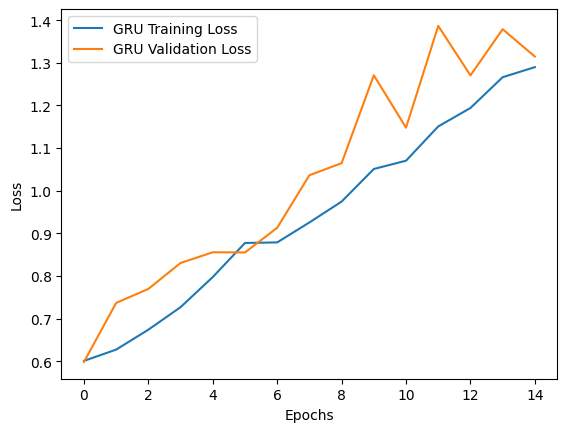

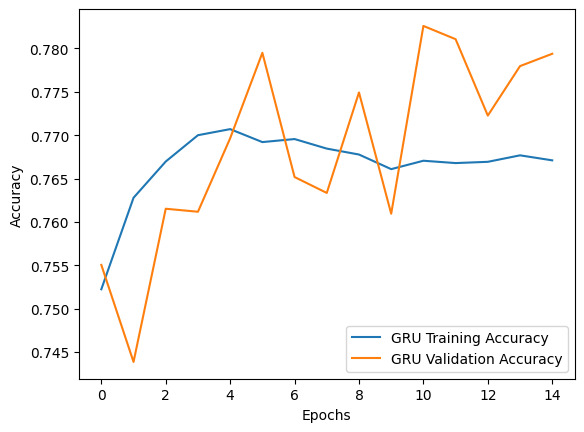

In [ ]:
# Attempt to improve SimpleRNN/versions of RNN - GRU (Gated Recurrent Unit) model.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

drive.mount('/content/drive')

netclean_redf_df_with_multi_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/netclean_redf_df_with_threat_type.csv', index_col=0)

# Features (X)
X = netclean_redf_df_with_multi_class.drop(['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss'], axis=1)

# Target variable (y)
y = netclean_redf_df_with_multi_class[['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss']]

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Reshape for RNN input, GRU
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Reshape for RNN input, GRU

# Creating a GRU model
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dense(9, activation='softmax'))  # Softmax for 9-class classification for each output

# Compiling the GRU model, batch_size=32, adding lr of 0.1 to improve accuracy, epoch 10, Test Accuracy GRU : 68.10%
# Compiling the GRU model, batch_size=32, adding lr of 0.01 to improve accuracy, epoch 10, Test Accuracy GRU : 80.96%
# Compiling the GRU model, batch_size=32, adding lr of 0.01 to improve accuracy, epoch 20, Test Accuracy GRU : 79.64%
# Compiling the GRU model, batch_size=16, adding lr of 0.01 to improve accuracy, epoch 10, Test Accuracy GRU : 76.96%
# Compiling the GRU model, batch_size=16, adding lr of 0.01 to improve accuracy, epoch 15, Test Accuracy GRU : 77.94%
opt = Adam(learning_rate=0.01)
model_gru.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_gru = model_gru.fit(X_train_rnn, y_train, epochs=15, batch_size=16, validation_data=(X_test_rnn, y_test))

# Evaluating the model
loss, accuracy = model_gru.evaluate(X_test_rnn, y_test)
print(f"Test Accuracy GRU : {accuracy * 100:.2f}%")

# Plotting training and validation loss
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

drive.mount('/content/drive')

netclean_redf_df_with_multi_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/netclean_redf_df_with_threat_type.csv', index_col=0)

# Features (X)
X = netclean_redf_df_with_multi_class.drop(['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss'], axis=1)

# Target variable (y)
y = netclean_redf_df_with_multi_class[['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss']]

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Reshape for RNN input, GRU
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Reshape for RNN input, GRU

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Function to create GRU model
def create_gru_model(units=64, return_sequences=True, learning_rate=0.01):
    model = Sequential()
    model.add(GRU(units=units, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=return_sequences))
    model.add(GRU(units=units))
    model.add(Dense(9, activation='softmax'))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a KerasClassifier
model = KerasClassifier(build_fn=create_gru_model, verbose=0)

# Parameters to search
param_grid = {
    'units': [32, 64, 128],
    'return_sequences': [True, False],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Define custom scorer for GridSearchCV, search_results = random_search_grid.fit(trainData, trainLabels)
scorer = make_scorer(accuracy_score)

# Convert one-hot encoded columns to class labels (assuming one-hot encoding)
y_train_labels = np.argmax(y_train.values, axis=1)
# Then Perform RandomizedSearchCV or GridSearchCV


# Perform GridSearchCV
#grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=KFold(n_splits=5, shuffle=True))
grid = RandomizedSearchCV(estimator=model,
                   param_distributions=param_grid,
                   scoring=scorer,
                   cv=KFold(n_splits=5, shuffle=True))
# Fit the grid search
grid_result = grid.fit(X_train_rnn, y_train_labels)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
params = grid_result.cv_results_['params']
print('Params', params)

#>>>>>Output Capture<<<<#
#Best: 0.790364 using {'units': 32, 'return_sequences': True, 'learning_rate': 0.01}




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-c9b56b8742ab>:56: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_gru_model, verbose=0)


2306/2306 [==============================] - 7s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 164, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
  File "<ip

Best: 0.790364 using {'units': 32, 'return_sequences': True, 'learning_rate': 0.01}
Params [{'units': 128, 'return_sequences': False, 'learning_rate': 0.01}, {'units': 128, 'return_sequences': False, 'learning_rate': 0.1}, {'units': 32, 'return_sequences': True, 'learning_rate': 0.1}, {'units': 32, 'return_sequences': True, 'learning_rate': 0.001}, {'units': 128, 'return_sequences': False, 'learning_rate': 0.001}, {'units': 128, 'return_sequences': True, 'learning_rate': 0.01}, {'units': 64, 'return_sequences': True, 'learning_rate': 0.1}, {'units': 128, 'return_sequences': True, 'learning_rate': 0.1}, {'units': 64, 'return_sequences': False, 'learning_rate': 0.001}, {'units': 32, 'return_sequences': True, 'learning_rate': 0.01}]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
11527/11527 [==============================] - 180s 12ms/step - loss: 1.8245 - accuracy: 0.6507 - val_loss: 1.8136 - val_accuracy: 0.6504
Epoch 2/10
11527/11527 [==============================] - 137s 12ms/step - loss: 1.8011 - accuracy: 0.6508 - val_loss: 1.8425 - val_accuracy: 0.6504
Epoch 3/10
11527/11527 [==============================] - 140s 12ms/step - loss: 1.8001 - accuracy: 0.6508 - val_loss: 1.8040 - val_accuracy: 0.6504
Epoch 4/10
11527/11527 [==============================] - 139s 12ms/step - loss: 1.8002 - accuracy: 0.6508 - val_loss: 1.8104 - val_accuracy: 0.6504
Epoch 5/10
11527/11527 [==============================] - 139s 12ms/step - loss: 1.8010 - accuracy: 0.6508 - val_loss: 1.8088 - val_accuracy: 0.6504
Epoch 6/10
11527/11527 [==============================] - 140s 12ms/step - loss: 1.7998 - accuracy: 0.6508 - val_loss: 1.8130 

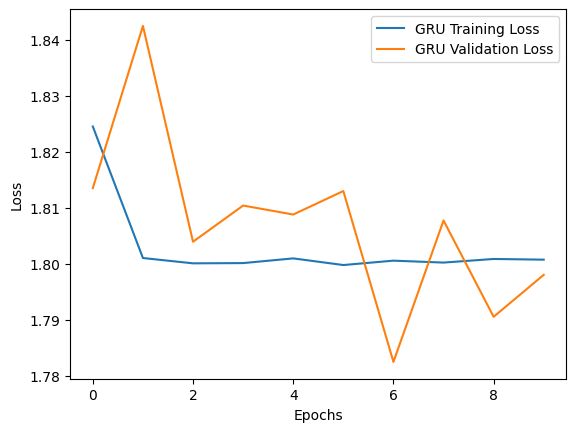

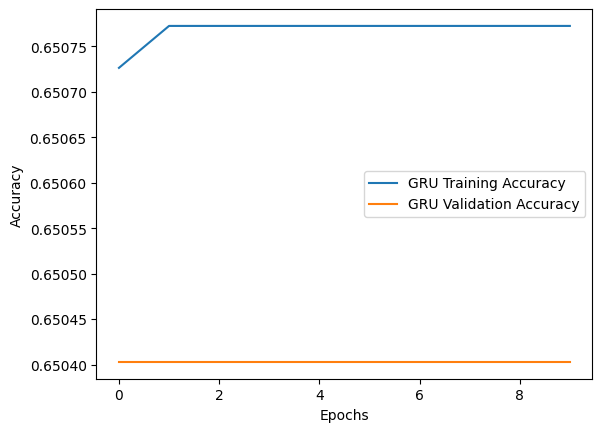

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 1, 128)            67200     
                                                                 
 dropout_6 (Dropout)         (None, 1, 128)            0         
                                                                 
 gru_13 (GRU)                (None, 1, 64)             37248     
                                                                 
 dropout_7 (Dropout)         (None, 1, 64)             0         
                                                                 
 gru_14 (GRU)                (None, 32)                9408      
                                                                 
 dense_4 (Dense)             (None, 9)                 297       
                                                                 
Total params: 114,153
Trainable params: 114,153
Non-tr

In [ ]:
#Using Best Model Parameters from above to print the plots.
#Best: 0.790364 using {'units': 32, 'return_sequences': True, 'learning_rate': 0.01}
#This iteration includes additional layer and dropout technique, and l2 regularization to improve model performance.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

drive.mount('/content/drive')

netclean_redf_df_with_multi_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/netclean_redf_df_with_threat_type.csv', index_col=0)

# Features (X)
X = netclean_redf_df_with_multi_class.drop(['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss'], axis=1)

# Target variable (y)
y = netclean_redf_df_with_multi_class[['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss']]

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Reshape for RNN input, GRU
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Reshape for RNN input, GRU

# Creating a GRU model
model_gru = Sequential()
model_gru.add(GRU(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True, kernel_regularizer=regularizers.l1(0.01)))
model_gru.add(Dropout(0.5))  # Adding dropout layer with a dropout rate of 0.5
model_gru.add(GRU(64, return_sequences=True, kernel_regularizer=regularizers.l1(0.01)))  # Additional GRU layer with return_sequences=True
model_gru.add(Dropout(0.5))  # Adding dropout layer with a dropout rate of 0.5
model_gru.add(GRU(32, kernel_regularizer=regularizers.l1(0.01)))  # Adding another GRU layer
model_gru.add(Dense(9, activation='softmax'))
opt = Adam(learning_rate=0.01)
model_gru.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_gru = model_gru.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluating the model
loss, accuracy = model_gru.evaluate(X_test_rnn, y_test)
print(f"Test Accuracy GRU : {accuracy * 100:.2f}%")

# Plotting training and validation loss
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_gru.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
11527/11527 [==============================] - 174s 9ms/step - loss: 0.5603 - accuracy: 0.7573 - val_loss: 0.5494 - val_accuracy: 0.7709
Epoch 2/10
11527/11527 [==============================] - 102s 9ms/step - loss: 0.5248 - accuracy: 0.7717 - val_loss: 0.6006 - val_accuracy: 0.7164
Epoch 3/10
11527/11527 [==============================] - 101s 9ms/step - loss: 0.5382 - accuracy: 0.7751 - val_loss: 0.5505 - val_accuracy: 0.7828
Epoch 4/10
11527/11527 [==============================] - 102s 9ms/step - loss: 0.5424 - accuracy: 0.7783 - val_loss: 0.5944 - val_accuracy: 0.7779
Epoch 5/10
11527/11527 [==============================] - 97s 8ms/step - loss: 0.5506 - accuracy: 0.7803 - val_loss: 0.5584 - val_accuracy: 0.7798
Epoch 6/10
11527/11527 [==============================] - 109s 9ms/step - loss: 0.5680 - accuracy: 0.7814 - val_loss: 0.6048 - val_a

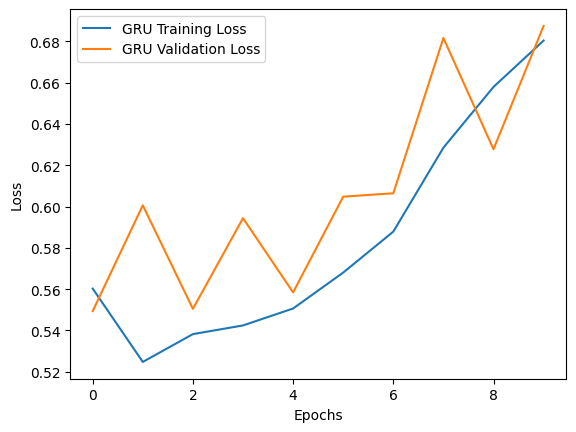

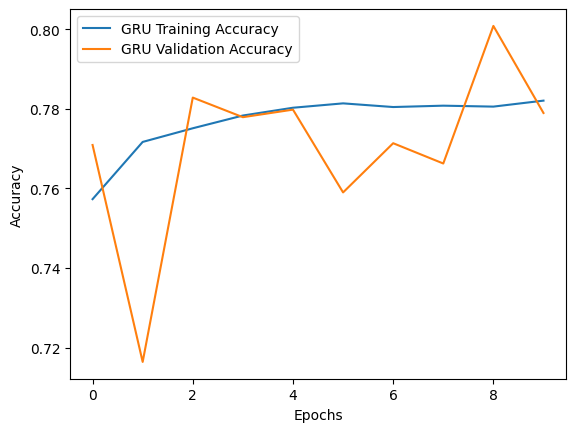

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_19 (GRU)                (None, 1, 64)             21312     
                                                                 
 gru_20 (GRU)                (None, 32)                9408      
                                                                 
 dense_7 (Dense)             (None, 9)                 297       
                                                                 
Total params: 31,017
Trainable params: 31,017
Non-trainable params: 0
_________________________________________________________________


,Layers
0,"Model: ""sequential_8"""
1,______________________________________________...
2,Layer (type) Output Shape ...
3,==============================================...
4,"gru_19 (GRU) (None, 1, 64) ..."
5,...
6,"gru_20 (GRU) (None, 32) ..."
7,...
8,"dense_7 (Dense) (None, 9) ..."
9,...


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# After trying out, GridSearch(various parameters), Regularization, adding layers, trying dropouts
# Simple architecture seems to work better. Model that performs better is given below.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

drive.mount('/content/drive')

netclean_redf_df_with_multi_class = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/capstone/capstone-dataset/netclean_redf_df_with_threat_type.csv', index_col=0)

# Features (X)
X = netclean_redf_df_with_multi_class.drop(['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss'], axis=1)

# Target variable (y)
y = netclean_redf_df_with_multi_class[['onehotencoder__type_ddos',
       'onehotencoder__type_dos', 'onehotencoder__type_injection',
       'onehotencoder__type_mitm', 'onehotencoder__type_normal',
       'onehotencoder__type_password', 'onehotencoder__type_ransomware',
       'onehotencoder__type_scanning', 'onehotencoder__type_xss']]

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))  # Reshape for RNN input, GRU
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Reshape for RNN input, GRU

# Creating a GRU model
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True))
model_gru.add(GRU(32))
model_gru.add(Dense(9, activation='softmax'))  # Softmax for 9-class classification for each output


# Compiling the GRU model, batch_size=32, adding lr of 0.01 to improve accuracy, epoch 10, Test Accuracy GRU : 80.96%

opt = Adam(learning_rate=0.01)
model_gru.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_gru = model_gru.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluating the model
loss, accuracy = model_gru.evaluate(X_test_rnn, y_test)
print(f"Test Accuracy GRU : {accuracy * 100:.2f}%")

# Plotting training and validation loss
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting training and validation accuracy
plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

model_gru.summary()
# Obtain model summary
summary = []
model_gru.summary(print_fn=lambda x: summary.append(x))  # Store the summary as a list

# Convert the summary list to a DataFrame
df_summary = pd.DataFrame(summary, columns=['Layers'])

# Display the DataFrame
df_summary.head(15)

#Result:#
#Which model performs better and why ?#
RNN seems to perform better, considering RNN leverages feedback mechanisms, remembers previous states and works well for time series. It is no surprise that RNN performs better then ANN or CNN neural networks.

Often cybersecurity attacks happens over time and gradually progresses to mature into a full blown attack, leveraging well known weakness on the outer most edge devices, compromises accounts, then starts penetrating deeper and deeper into the network to obtain sensitive information finally ending in an attack. Since the nature of cyberattacks are sequential and progressive with time. It is no surprise that RNN and version of RNN models(GRU in this case) performs better.